In [204]:
# 1. import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import folium

In [205]:
# create police_calls dataframe from csv file
police_calls = pd.read_csv('C:\\Users\\jimmy\\Documents\\NSS_Analytics_Jumpstart\\data\\police_calls_2018.csv')

In [206]:
# look at first 5 rows
police_calls.head(5)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [207]:
# look at last 3 rows
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


In [208]:
# 2. how many rows and columns (rows, columns)
police_calls.shape

(718021, 18)

In [209]:
# show all columns in the dataframe. I do this so I can easily copy the column names for the next step
police_calls.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [210]:
# 3. keep just the specified columns (drop others)
police_calls = police_calls.drop(columns=['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])

In [211]:
# 4. rename columns
police_calls = police_calls.rename(columns= {
    'Call Received':'call_time', 
    'Shift':'shift', 
    'Tencode':'tencode', 
    'Tencode Description':'tencode_desc',
    'Disposition Code':'disposition', 
    'Disposition Description':'disposition_desc', 
    'Unit Dispatched':'unit_dispatched',
    'Sector':'sector', 
    'Zone':'zone', 
    'Latitude':'lat', 
    'Longitude':'lng', 
    'zipcode':'zipcode', 
    'PO':'po'
})

In [212]:
# 5. how many different call signs are in the data?
police_calls['unit_dispatched'].nunique()

2477

In [213]:
# 6. which shift had the highest volume of calls?
police_calls['shift'].value_counts().sort_values(ascending=False)

shift
B    278672
A    240728
C    168606
Name: count, dtype: int64

In [214]:
# 7. what are the unique disposition decriptions?
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

In [215]:
# 8(a). remove all rows where disposition description is missing (NaN)
police_calls = police_calls.dropna(subset='disposition_desc')

In [216]:
# 8(b, c). remove rows where disposition description is 'disregard / signal 9' or 'no response'
# use tilde (~) to negate...this means, 'where disposition_desc is not in ...'
police_calls = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9', 'NO RESPONSE'])]

In [217]:
# 8(d) make sure you have 624,841 rows remaining
police_calls.shape

(624841, 13)

In [218]:
# 9. create a dataframe from the tencode_desc value counts called tencode_counts
#  reset_index() is needed to conver this from a pandas series to a pandas dataframe
tencode_counts = police_calls['tencode_desc'].value_counts().reset_index()

In [219]:
# rename the columns to tencode_desc and tencode_count
tencode_counts.columns = ['tencode_desc','tencode_count']

In [220]:
# verify the dataframe was created correctly, just look at the first 5 rows
tencode_counts.head(5)

,tencode_desc,tencode_count
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001


<Axes: ylabel='tencode_desc'>

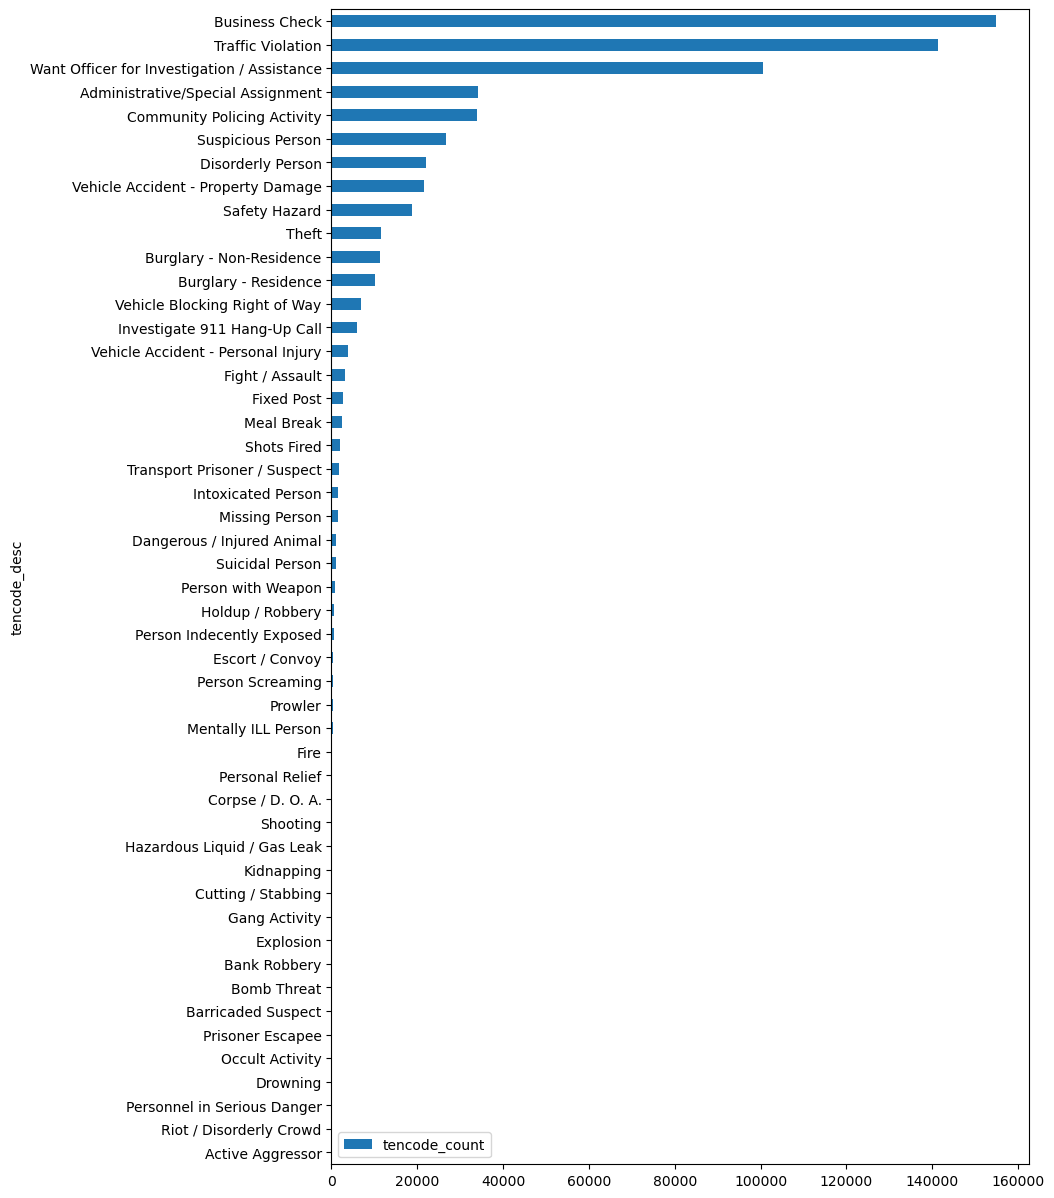

In [221]:
# 10. create a horizontal barplot to show calls by tencode
# I use the sort_values so the largest counts show on top
# play with the figsize values to get all values to show in the plot (this is a long list)
# this is a basic plot using Pandas, Seaborn will help us make a better looking plot
tencode_counts.sort_values('tencode_count').plot(kind = 'barh',
                                                 x = 'tencode_desc',
                                                 y = 'tencode_count',
                                                 figsize = (9,15))

In [222]:
# 11. find the counts of calls by zip code
calls_per_zipcode = police_calls['zipcode'].value_counts().sort_values(ascending=False).reset_index()

In [223]:
# Convert the zipcode column from int (number) to string (categorical)
calls_per_zipcode['zipcode'] = calls_per_zipcode['zipcode'].astype(str)

In [224]:
# verify column type is 'object' (this means the column type in the dataframe is a string)
calls_per_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  38 non-null     object
 1   count    38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 740.0+ bytes


<Axes: title={'center': 'Calls by Zip Code'}, ylabel='zipcode'>

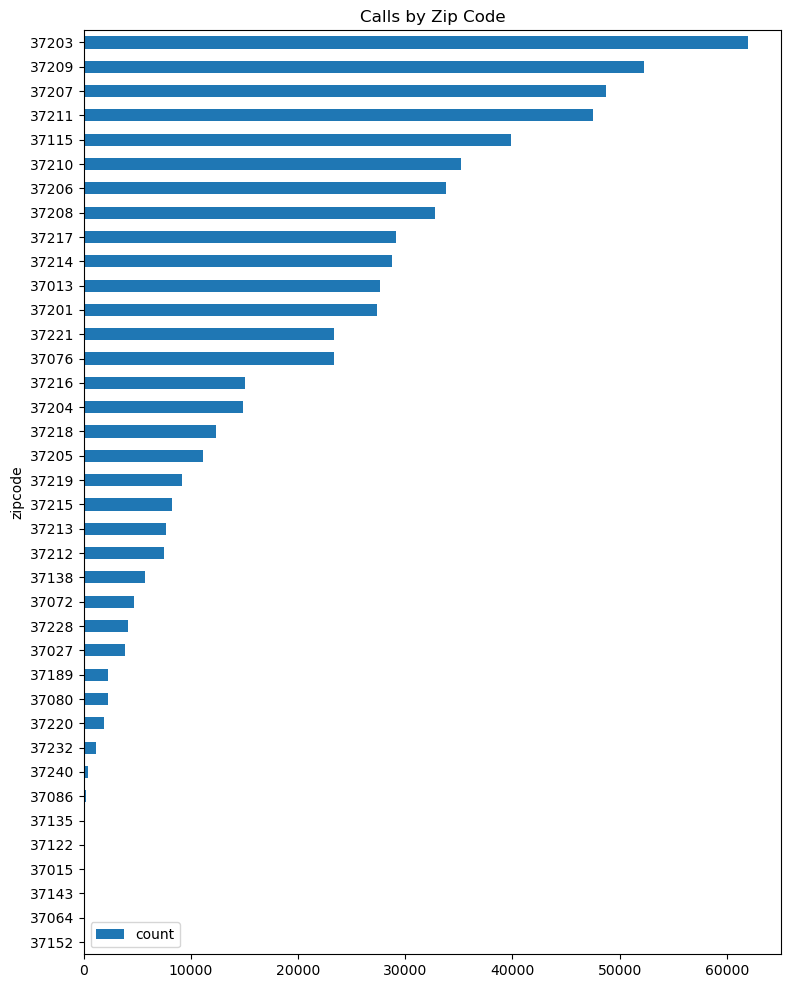

In [225]:
# plot calls per zip code, sort by count so large numbers show first, give it a meaningful title, figsize to show all values
calls_per_zipcode.sort_values('count').plot(kind = 'barh',
                                            x = 'zipcode',
                                            y = 'count',
                                            title = 'Calls by Zip Code',
                                            figsize = (9,12))

In [226]:
# create a separate dataframe of just 'community policing activity' tencode descriptions
# this is an intermediate step and makes it easier and more readable to do the future group by zipcode calculations
cp_police_calls = police_calls.loc[police_calls['tencode_desc'] == 'Community Policing Activity']

In [227]:
cp_police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
9,02/16/2018 08:32:00 PM,B,15,Community Policing Activity,15,COMMUNITY POLICING,522B,H,21,36.199,-86.619,37076,HERMITAGE
16,02/16/2018 05:35:00 PM,B,15,Community Policing Activity,12,LOCATION/BUILDING SECURE,2945,H,33,36.157,-86.619,37076,HERMITAGE
27,02/16/2018 03:49:00 PM,B,15,Community Policing Activity,15,COMMUNITY POLICING,522B,H,23,36.199,-86.612,37076,HERMITAGE
47,02/16/2018 04:56:00 PM,B,15,Community Policing Activity,15,COMMUNITY POLICING,522B,H,23,36.214,-86.598,37076,HERMITAGE
78,02/17/2018 12:52:00 PM,A,15,Community Policing Activity,15,COMMUNITY POLICING,511A,H,21,36.194,-86.617,37076,HERMITAGE


In [228]:
# create a community_policing data frame from the counts by zip code
community_policing = cp_police_calls['zipcode'].value_counts().reset_index()

In [229]:
# look at the statistics, the community policing zip code counts don't match the overall counts by zip code
community_policing

,zipcode,count
0,37209,6456
1,37203,3920
2,37221,2993
3,37201,2056
4,37206,1895
5,37208,1718
6,37211,1629
7,37210,1501
8,37207,1484
9,37205,1216


In [230]:
police_calls.head(3)

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE
1,02/16/2018 08:02:00 PM,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE
2,02/16/2018 10:16:00 PM,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE


In [231]:
# 13. convert the call_time column in police_calls to pandas datetime, specify the format to help the process
police_calls['call_time'] = pd.to_datetime(police_calls['call_time'], format='%m/%d/%Y %I:%M:%S %p')

In [232]:
# create the new column for month to store the month in which the call occurred, verify the results
police_calls['month'] = police_calls['call_time'].dt.month
police_calls.head()

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit_dispatched,sector,zone,lat,lng,zipcode,po,month
0,2018-02-16 19:09:00,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.210,-86.600,37076,HERMITAGE,2
1,2018-02-16 20:02:00,B,93,Traffic Violation,9,SUBJECT WARNED,5F34,H,21,36.169,-86.601,37076,HERMITAGE,2
2,2018-02-16 22:16:00,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,521B,H,21,36.178,-86.616,37076,HERMITAGE,2
3,2018-02-16 17:58:00,B,87,Safety Hazard,3,CITATION - TRAFFIC,5122,H,23,36.170,-86.591,37076,HERMITAGE,2
4,2018-02-16 16:19:00,B,93,Traffic Violation,9,SUBJECT WARNED,521B,H,23,36.175,-86.596,37076,HERMITAGE,2


In [233]:
# show calls by month, this data is probably incomplete (why no calls in Oct, Nov, Dec?)
# use the sort_index rather than sort_values so we can sort this by month
police_calls['month'].value_counts().sort_index()

month
1    85094
2    72413
3    79892
4    65953
5    74718
6    73098
7    57558
8    73181
9    42934
Name: count, dtype: int64

In [234]:
# 14. which days of the week get the most calls? I add a column to store the day name for each call
police_calls['day_of_week'] = police_calls['call_time'].dt.day_name()

In [235]:
# Tuesday and Wednesday have the most calls, Saturday and Sunday the least
police_calls['day_of_week'].value_counts().sort_values(ascending=False)

day_of_week
Tuesday      102706
Wednesday    101700
Thursday      97885
Friday        95998
Monday        92536
Saturday      71102
Sunday        62914
Name: count, dtype: int64

## Week two tasks below

In [236]:
# 15. read 2018 hubNashville data into a dataframe
hub = pd.read_csv('C:\\Users\\jimmy\\Documents\\NSS_Analytics_Jumpstart\\data\\hubNashville_2018.csv')

In [237]:
# 16. rename the column names, lower case 
hub = hub.rename(columns={'Request #':'request_id', 
                    'Status':'status', 
                    'Request Type':'request_type', 
                    'Subrequest Type':'subrequest_type',
                    'Additional Subrequest Type':'add_subrequest_type', 
                    'Date / Time Opened':'opened',
                    'Date / Time Closed':'closed', 
                    'Request Origin':'origin', 
                    'Zipcode':'zipcode', 
                    'Latitude':'lat',
                    'Longitude':'lng'})

In [238]:
# 17. drop rows from hub where closed column values are missing, count the number of records, should end up with 80,866 rows
hub = hub.dropna(subset='closed')
hub.shape

(80866, 11)

In [239]:
# 17. convert opened and closed to datetime format
hub.opened = pd.to_datetime(hub.opened, format= "%Y-%m-%d %H:%M:%S")
hub.closed = pd.to_datetime(hub.closed, format= "%m/%d/%Y %I:%M:%S %p")

In [240]:
# 17. create a column resolution_time to store how long the request was open
hub['resolution_time'] = hub.closed - hub.opened

In [241]:
# 18. were any records open for longer than a year? Yes, 288 records
hub[hub.resolution_time > pd.Timedelta(days=365)].shape

(288, 12)

In [242]:
# 18. which was the most common request type open for more than a year? 'streets, roads & sidewalks' 159 records
hub[hub.resolution_time > pd.Timedelta(days=365)].value_counts(subset='request_type')

request_type
Streets, Roads & Sidewalks    159
Property Violations            73
Other                          14
Public Safety                  14
Electric & Water General       10
Trash, Recycling & Litter       9
Education & Libraries           5
Planning & Zoning               2
Social Services & Housing       2
Name: count, dtype: int64

In [243]:
# 18. save the records longer than a year to a new dataframe, slow_to_resolve
slow_to_resolve = hub[hub.resolution_time > pd.Timedelta(days=365)]

In [244]:
# 19. Create a new resolution_time_hours column by dividing the resolution_time column by pd.Timedelta(hours = 1).
hub['resolution_time_hours'] = hub.resolution_time / pd.Timedelta(hours=1)

In [245]:
# 20. look at the distribution (first by describe function, then with histogram)
hub.resolution_time_hours.describe()

count    80866.000000
mean       352.098805
std       1038.193432
min          0.000000
25%         25.973958
50%         73.271944
75%        203.533333
max      22514.371111
Name: resolution_time_hours, dtype: float64

<Axes: ylabel='Frequency'>

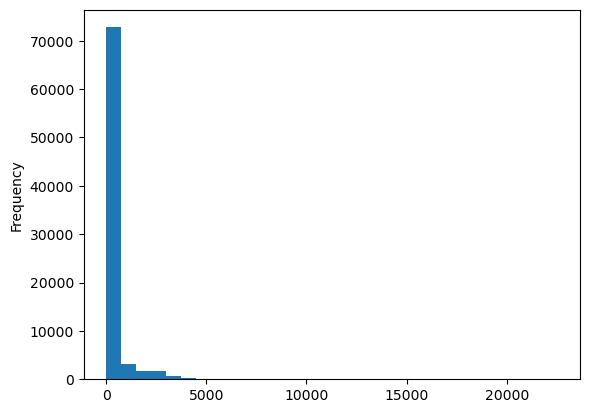

In [246]:
# 20. look at histogram of resolution_time_hours values, what do you notice?
# heavily skewed dataset, skewed toward smaller resolution_time_hours values
hub.resolution_time_hours.plot.hist(bins=30)

In [247]:
# 21. create new dataframe, streets_median, to store median resolution time by zip code
streets_median = hub[hub.request_type == 'Streets, Roads & Sidewalks'].groupby('zipcode').resolution_time_hours.median().reset_index()

In [248]:
# 21. rename resolution_time_hours to median_resolution_time
streets_median = streets_median.rename(columns={'resolution_time_hours': 'median_resolution_time'})

In [249]:
# 22. read population data into population dataframe
population = pd.read_csv('C:\\Users\\jimmy\\Documents\\NSS_Analytics_Jumpstart\\data\\population_2018.csv')

In [250]:
# 22. look at the 2 dataframe structures to make sure the zipcode columns are the same type so they can be joined
population.info()
calls_per_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zipcode                   39 non-null     int64  
 1   population                39 non-null     float64
 2   ratio_in_davidson_county  39 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zipcode  38 non-null     object
 1   count    38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 740.0+ bytes


In [251]:
# 22. change the calls_per_zipcode zipcode field to integer, 64-bit, to match the datatype of population dataframe (zipcode column)
calls_per_zipcode.zipcode = calls_per_zipcode.zipcode.astype('int64')

In [252]:
# 22. perform a left join to calls_per_zipcode (keep all zip codes from calls_per_zipcode)
# and then assign it back to the calls_per_zipcode dataframe
calls_per_zipcode = pd.merge(calls_per_zipcode, population, how = 'left', on= 'zipcode')

In [253]:
# 22. look at the dataframe, we should change the count column (reserved word in programming)
calls_per_zipcode.head()

,zipcode,count,population,ratio_in_davidson_county
0,37203,61962,14232.0,1.000000
1,37209,52248,38794.0,0.999105
2,37207,48750,38583.0,1.000000
3,37211,47528,76834.0,0.999886
4,37115,39879,40484.0,1.000000


In [254]:
# we should rename the dataframe column 'count' since it is a reserved word (programming best practice)
calls_per_zipcode = calls_per_zipcode.rename(columns={'count':'police_calls'})

In [255]:
# 23. create a column called 'calls_per_capita' by dividing the number of police calls by the population of each zip code
calls_per_zipcode['calls_per_capita'] = calls_per_zipcode.police_calls / calls_per_zipcode.population

In [256]:
# 23. which zip codes have the highest calls per capita?
calls_per_zipcode.sort_values(by='calls_per_capita', ascending=False)

,zipcode,police_calls,population,ratio_in_davidson_county,calls_per_capita
20,37213,7709,100.0,1.000000,77.090000
11,37201,27376,1372.0,1.000000,19.953353
18,37219,9203,1134.0,1.000000,8.115520
0,37203,61962,14232.0,1.000000,4.353710
24,37228,4104,1206.0,1.000000,3.402985
5,37210,35232,17935.0,1.000000,1.964427
7,37208,32796,17582.0,1.000000,1.865317
1,37209,52248,38794.0,0.999105,1.346806
6,37206,33776,25470.0,1.000000,1.326109
2,37207,48750,38583.0,1.000000,1.263510


In [257]:
# 24. create a connection to the survey data db and a cursor to find all available tables in the database
conn = sql.connect('C:\\Users\\jimmy\\Documents\\NSS_Analytics_Jumpstart\\data\\metro_survey.db')
cur = conn.cursor()

In [258]:
# 24. get all tables and make sure they match the metro_survey_ERD diagram
cur.execute("select name from sqlite_master where type='table' ORDER by name")
available_tables = cur.fetchall()

available_tables

[('codes',),
 ('equality_and_access',),
 ('general_services',),
 ('info',),
 ('overall',),
 ('recreation',),
 ('safety',),
 ('transportation',)]

In [259]:
# 25. write a query to join safety and info tables on Id and load them into a single pandas df
query = "select * from safety as s join info as i on s.Id = i.Id"

safety_exp = pd.read_sql(query, conn)

In [260]:
# 25. Slice safety_exp to get the ZIP Code, and 'Police - Overall', columns. It’s fine to save it back to the safety_exp variable.
safety_exp = safety_exp[['ZIP Code', 'Police - Overall']]

In [261]:
# 26. group by zipcode and police-overall, count the results and name that column, responses
police_survey_by_zip = safety_exp.groupby(['ZIP Code', 'Police - Overall']).size().reset_index(name='responses')

In [262]:
# rename the columns so I can use dot name notation
police_survey_by_zip = police_survey_by_zip.rename(columns={'ZIP Code': 'zipcode', 'Police - Overall': 'police_overall'})
police_survey_by_zip.head()

,zipcode,police_overall,responses
0,37013,Dissatisfied,28
1,37013,Don't Know,8
2,37013,Neutral,36
3,37013,Satisfied,79
4,37013,Very Dissatisfied,8


In [263]:
# change the zipcode field type to string
police_survey_by_zip.zipcode = police_survey_by_zip.zipcode.astype(str)

<Axes: xlabel='police_overall'>

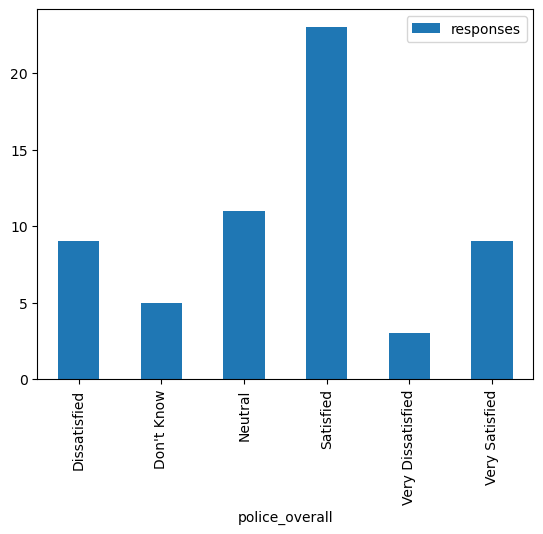

In [264]:
# zip code 37203 results
police_survey_by_zip[police_survey_by_zip['zipcode'] == '37203'].plot(kind='bar', x='police_overall', y='responses')

<Axes: xlabel='police_overall'>

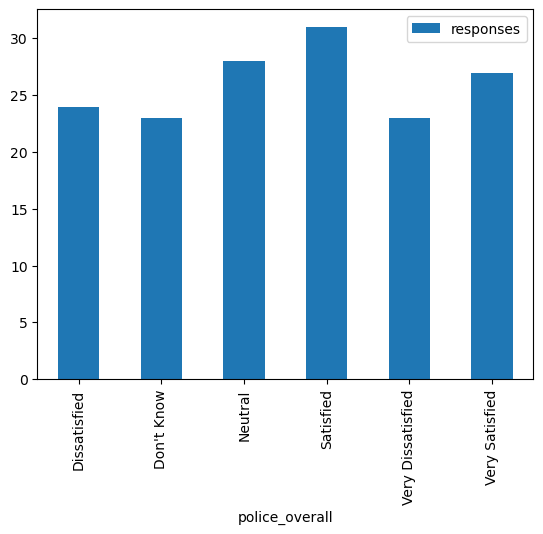

In [265]:
# how does this compare to overall? need to re-group by police_overall (not grouping by zip code)
police_survey_by_zip.groupby(by='police_overall').size().reset_index(name='responses').plot(kind='bar', x='police_overall', y='responses')

In [266]:
# 27. streets and sidewalks-overall column analysis, same steps as before...join from general services to info to get zip code of responses
ssw = pd.read_sql("select * from general_services gs join info i on gs.Id = i.Id", conn)

In [267]:
# rename the columns to make them easier to use with dot notation
ssw = ssw.rename(columns={'Streets and Sidewalks - Overall':'ssw_overall',
                    'ZIP Code':'zipcode'})

In [268]:
# group by zip code and ssw_overall to get responses counted by zip code and response, this renames the last column as 'responses'
ssw = ssw.groupby(['zipcode','ssw_overall']).size().reset_index(name='responses')
ssw.zipcode = ssw.zipcode.astype(str)

In [269]:
# look at results - this dataframe uses the slow_to_resolve dataframe created earlier...look at the number, mean resolution time and median time of slow to resolve events
# I turn this into a dataframe so I can join it to the ssw dataframe with sidewalk responses
slow_to_resolve_summary = slow_to_resolve.groupby(['zipcode'])['resolution_time'].agg(['count','mean','median']).reset_index()

In [270]:
# I noticed a '.0' at the end of my zipcode...replace did not work so I did a left 5 slice of the column
slow_to_resolve_summary.zipcode = slow_to_resolve_summary.zipcode.astype(str).str[:5]

In [271]:
# rename the columns to make them more readable
slow_to_resolve_summary = slow_to_resolve_summary.rename(columns={'count':'num_slow_events', 
                                                                  'mean':'avg_resolution_time', 
                                                                  'median':'median_resolution_time'})

In [272]:
# join the 2 dataframes and view the results
ssw_slowresolve = pd.merge(ssw, slow_to_resolve_summary, how='left', on='zipcode')

In [274]:
ssw_slowresolve

,zipcode,ssw_overall,responses,num_slow_events,avg_resolution_time,median_resolution_time
0,37013,Dissatisfied,69,6.0,560 days 19:33:05.833333336,519 days 00:51:39
1,37013,Don't Know,2,6.0,560 days 19:33:05.833333336,519 days 00:51:39
2,37013,Neutral,35,6.0,560 days 19:33:05.833333336,519 days 00:51:39
3,37013,Satisfied,33,6.0,560 days 19:33:05.833333336,519 days 00:51:39
4,37013,Very Dissatisfied,38,6.0,560 days 19:33:05.833333336,519 days 00:51:39
...,...,...,...,...,...,...
149,37228,Neutral,2,NaN,NaT,NaT
150,37228,Satisfied,1,NaN,NaT,NaT
151,37228,Very Dissatisfied,3,NaN,NaT,NaT
152,37228,Very Satisfied,1,NaN,NaT,NaT


In [277]:
# 29. construct a map of Nashville
nash_map = folium.Map(location = [36.1612, -86.7775], zoom_start=12)
nash_map

In [280]:
# preview the slow_to_resolve dataframe
slow_to_resolve.head()

,request_id,status,request_type,subrequest_type,add_subrequest_type,opened,closed,origin,zipcode,lat,lng,resolution_time
244,112161,Closed,Property Violations,Residential Complaint,Residential Complaint,2018-10-25 18:28:49,2020-03-18 08:12:19,hubNashville Community,37115.0,36.258170,-86.695750,509 days 13:43:30
250,123468,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2018-12-14 13:12:04,2020-06-29 14:41:39,Phone,37207.0,36.245086,-86.773350,563 days 01:29:35
427,48380,Closed,"Streets, Roads & Sidewalks",Dip/Bump in Roadway,Dip/Bump in Roadway,2018-02-22 16:38:31,2019-12-30 16:59:17,hubNashville Community,37221.0,36.062642,-86.972435,676 days 00:20:46
522,117153,Closed,Other,Other,Other,2018-11-16 03:45:14,2020-01-17 20:39:58,hubNashville Community,37115.0,36.243802,-86.717873,427 days 16:54:44
577,84291,Closed,Property Violations,Cars Parked on Lawn,Cars Parked on Lawn,2018-07-19 18:50:09,2020-05-08 07:10:49,hubNashville Community,37211.0,36.127623,-86.757789,658 days 12:20:40


In [291]:
# 30. iterate through the slow_to_resolve dataframe, creating a location for every request in the slow_to_resolve dataframe and add to nash_map
# I also customized the icon
for index, row in slow_to_resolve.iterrows():
    point = [row['lat'], row['lng']]
    message = row['request_type'] + ': ' + str(row['opened']) + ': ' + row['subrequest_type']
    mapicon = folium.Icon(color='green',
                       icon='phone-square',
                       prefix='fa')    
    folium.Marker(location = point, popup = message, icon=mapicon).add_to(nash_map)

nash_map